In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import  numpy as np

In [4]:
 df = pd.read_csv(r'C:\Users\srith\OneDrive\Desktop\archive (6)\EV_Dataset.csv')

In [5]:
df.head(5)

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,01-01-2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
1,2014,jan,01-01-2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
2,2014,jan,01-01-2014,Andhra Pradesh,AMBULANCE,Others,Others,0
3,2014,jan,01-01-2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
4,2014,jan,01-01-2014,Andhra Pradesh,BUS,Bus,Bus,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               96845 non-null  int64 
 1   Month_Name         96845 non-null  object
 2   Date               96845 non-null  object
 3   State              96845 non-null  object
 4   Vehicle_Class      96845 non-null  object
 5   Vehicle_Category   96845 non-null  object
 6   Vehicle_Type       96845 non-null  object
 7   EV_Sales_Quantity  96845 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 5.9+ MB


In [7]:
df.shape

(96845, 8)

In [8]:
df.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [9]:
# TOTAL EV SALES PER EACH YEAR 
Total_sales_per_year = df.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()
Total_sales_per_year.columns = ['Year', 'Total_Sales_Quantity']
Total_sales_per_year['Total_Sales_in_Millions'] = (Total_sales_per_year['Total_Sales_Quantity'] / 1_000_000).round(4)
Total_sales_per_year = Total_sales_per_year.sort_values(by='Year')
print(Total_sales_per_year)

    Year  Total_Sales_Quantity  Total_Sales_in_Millions
0   2014                  2392                   0.0024
1   2015                  7805                   0.0078
2   2016                 49855                   0.0499
3   2017                 87420                   0.0874
4   2018                130254                   0.1303
5   2019                166819                   0.1668
6   2020                124684                   0.1247
7   2021                331498                   0.3315
8   2022               1024723                   1.0247
9   2023               1525179                   1.5252
10  2024                143182                   0.1432


<Axes: xlabel='Year'>

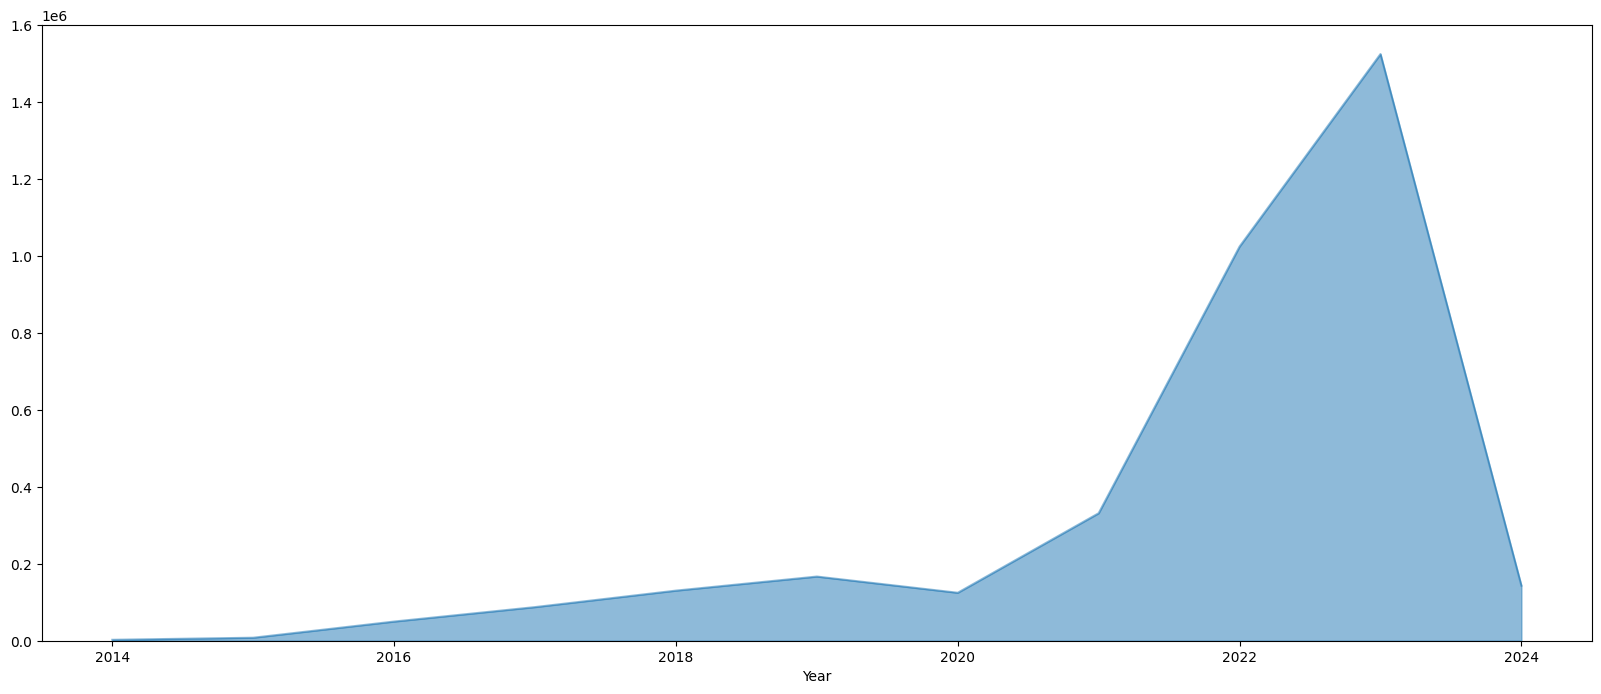

In [10]:
plt.figure(figsize=(20,8))
df.groupby('Year')['EV_Sales_Quantity'].sum().plot(kind='area', alpha=0.5)

In [11]:
# AVERAGE SALES PER YEAR 
avg_sales_per_year = df.groupby('Year')['EV_Sales_Quantity'].mean().reset_index()
avg_sales_per_year.columns = ['Year', 'Average_Sales_Quantity']
avg_sales_per_year['Average_Sales_Quantity'] = avg_sales_per_year['Average_Sales_Quantity'].round(3)
avg_sales_per_year = avg_sales_per_year.sort_values(by='Year')
print(avg_sales_per_year)

    Year  Average_Sales_Quantity
0   2014                   0.265
1   2015                   0.862
2   2016                   5.333
3   2017                   8.921
4   2018                  12.739
5   2019                  16.172
6   2020                  14.373
7   2021                  35.841
8   2022                 102.258
9   2023                 148.378
10  2024                 166.491


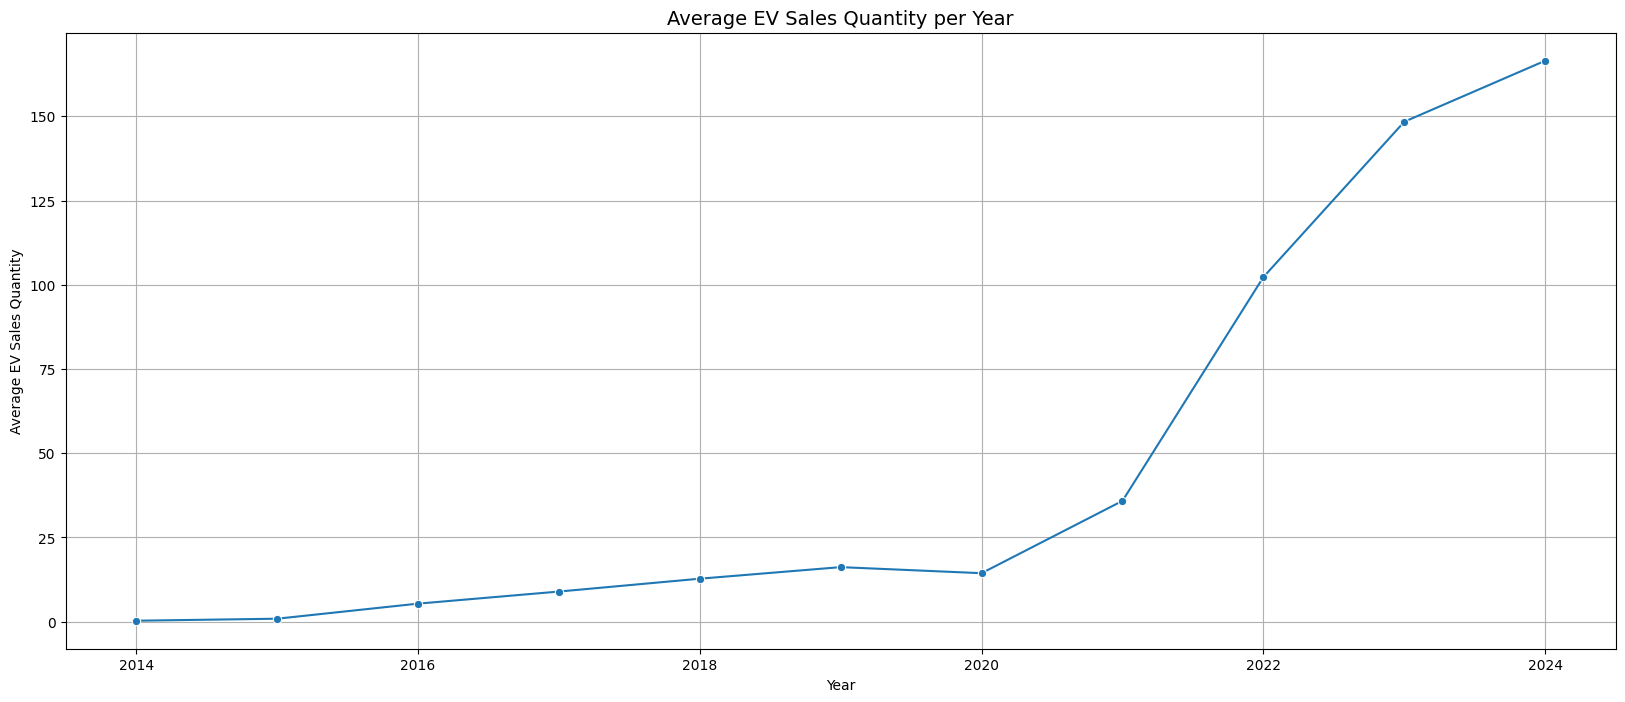

In [12]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Year', y='Average_Sales_Quantity', data=avg_sales_per_year, marker='o')
plt.title('Average EV Sales Quantity per Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average EV Sales Quantity')
plt.grid(True)
plt.show()


In [13]:
# STATE AND TOTAL SALES ACROSS THE STATES
state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().reset_index()
state_sales.columns = ['State', 'Total_Sales']
state_sales = state_sales.sort_values(by='Total_Sales', ascending=False)
print(state_sales)

                       State  Total_Sales
31             Uttar Pradesh       732074
19               Maharashtra       401535
15                 Karnataka       315498
8                      Delhi       268538
27                 Rajasthan       228573
4                      Bihar       213465
29                Tamil Nadu       206902
10                   Gujarat       176713
3                      Assam       151917
16                    Kerala       133246
18            Madhya Pradesh       133182
24                    Odisha        86823
11                   Haryana        85250
33               West Bengal        78112
1             Andhra Pradesh        77356
6               Chhattisgarh        75275
32               Uttarakhand        57606
26                    Punjab        49285
14                 Jharkhand        47871
30                   Tripura        18346
9                        Goa        17382
13         Jammu and Kashmir        16840
5                 Chandigarh      

<Axes: xlabel='State'>

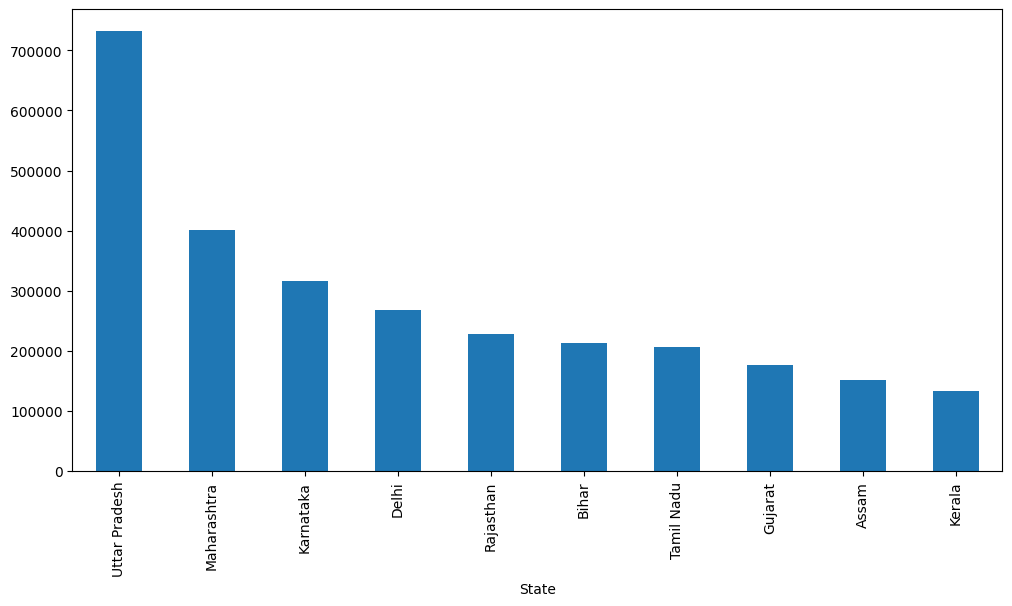

In [14]:
# TOP 10 STATES 
state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)
state_sales.plot(kind='bar', figsize=(12,6))


In [15]:
# TOP 10 VEHICLE CLASS
df['Vehicle_Class'].value_counts().head(10)

Vehicle_Class
MOTOR CAR                    4111
M-CYCLE/SCOOTER              4101
GOODS CARRIER                4096
MOTOR CAB                    3985
BUS                          3813
THREE WHEELER (PASSENGER)    3786
MAXI CAB                     3684
MOPED                        3399
AMBULANCE                    3393
THREE WHEELER (GOODS)        3208
Name: count, dtype: int64

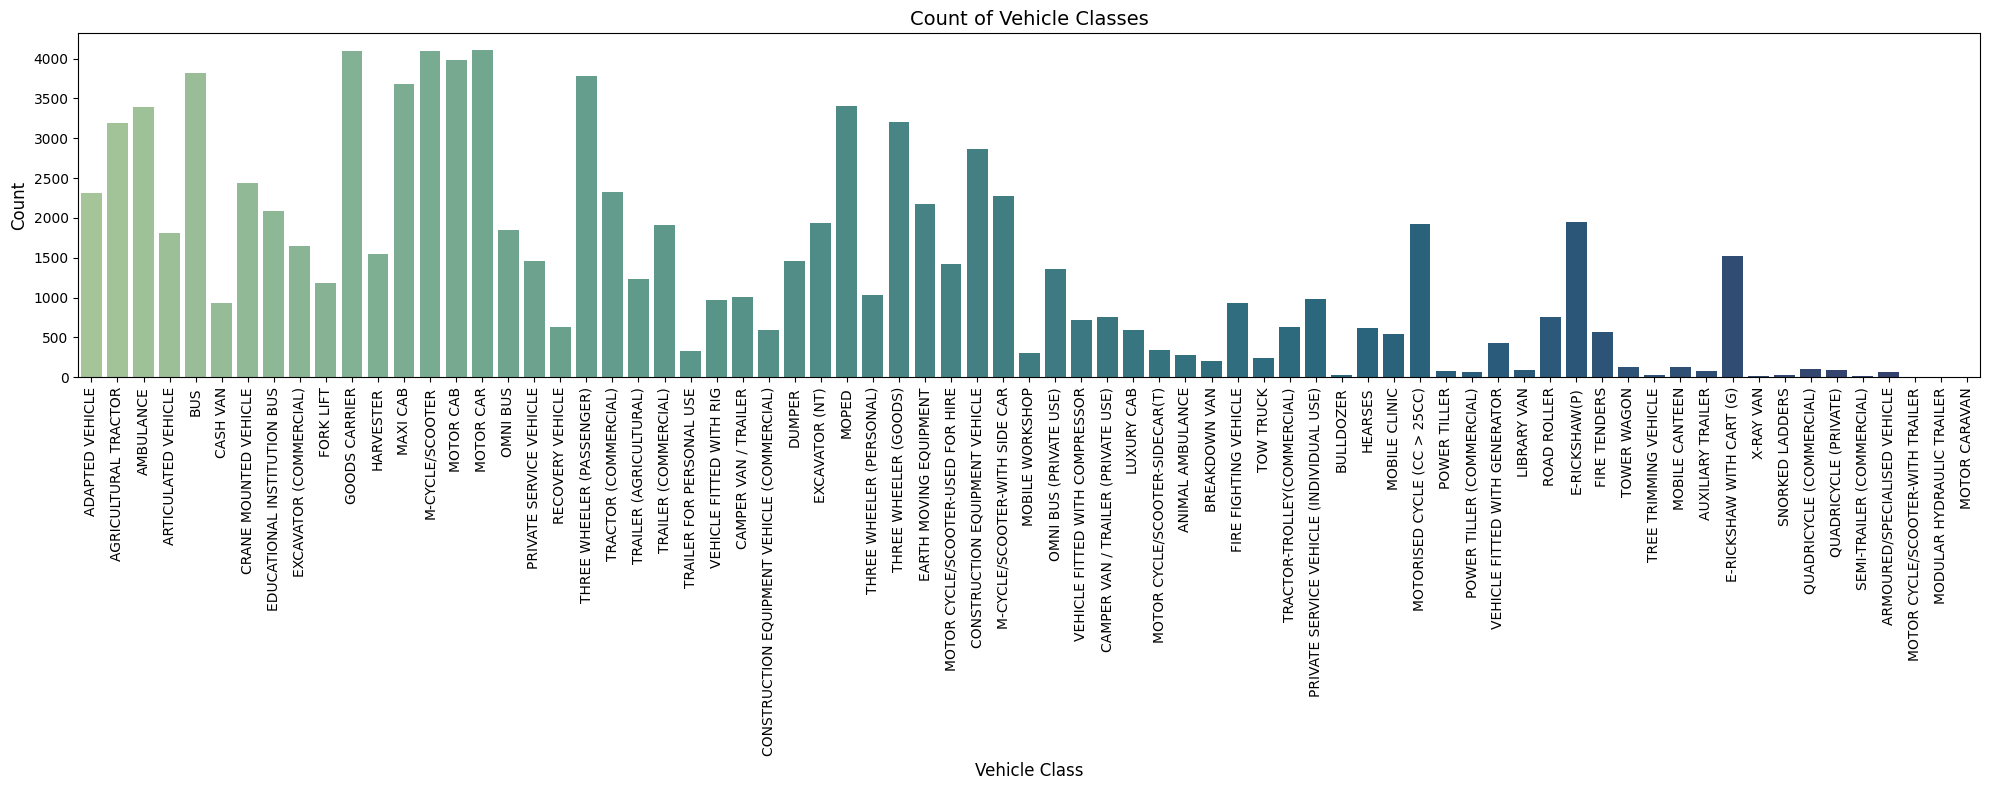

In [16]:

plt.figure(figsize=(20,8))

# Generate enough unique colors for all vehicle classes
unique_classes = df['Vehicle_Class'].nunique()
palette = sns.color_palette("crest", n_colors=unique_classes)  # blue-green shades

sns.countplot(
    x="Vehicle_Class",
    data=df,
    hue="Vehicle_Class",
    palette=palette,
    legend=False  # hides the redundant legend
)

plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Vehicle Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Count of Vehicle Classes", fontsize=14)
plt.tight_layout()
plt.show()


In [17]:
# VEHICLE TYPE 
df['Vehicle_Type'].value_counts()

Vehicle_Type
Others                54423
2W_Personal           11700
Bus                    7026
4W_Shared              4580
4W_Personal            4111
3W_Shared              3786
3W_Goods               3208
Institution Bus        2093
3W_Shared_LowSpeed     1951
3W_Goods_LowSpeed      1517
2W_Shared              1421
3W_Personal            1029
Name: count, dtype: int64

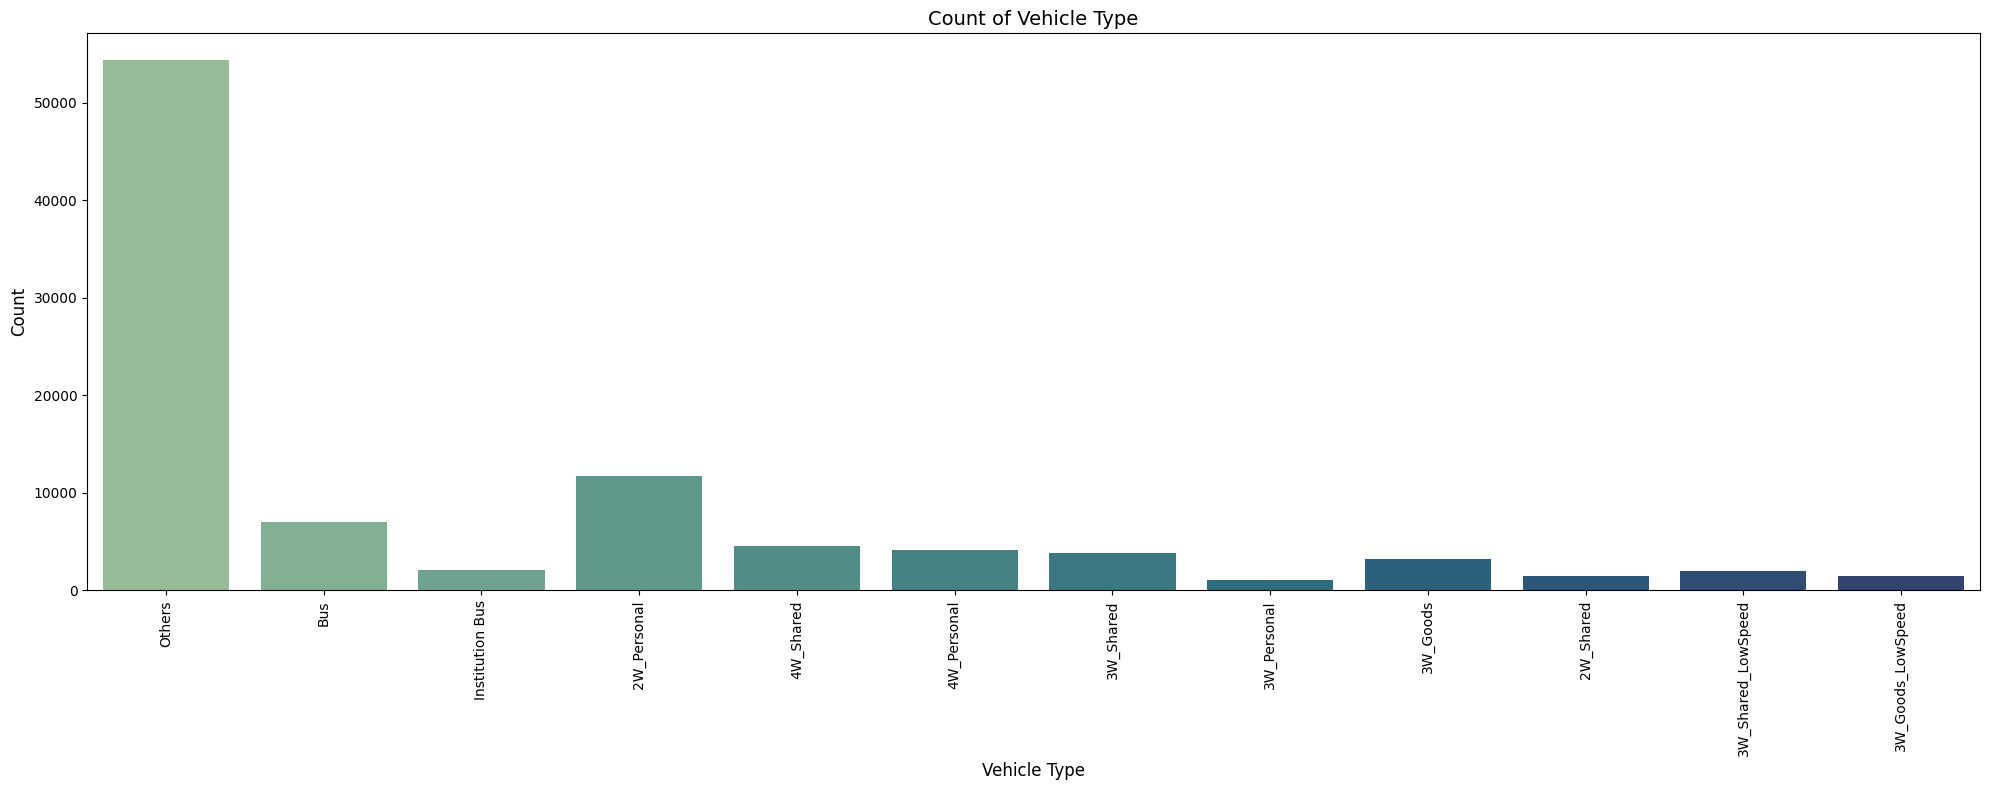

In [22]:

plt.figure(figsize=(20,8))
unique_types = df['Vehicle_Type'].nunique()
palette = sns.color_palette("crest", n_colors=unique_types)  

sns.countplot(
    x="Vehicle_Type",
    data=df,
    hue="Vehicle_Type",    
    palette=palette,
    legend=False            
)

plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Count of Vehicle Type", fontsize=14)
plt.tight_layout()
plt.show()



<Axes: xlabel='Month_Name', ylabel='EV_Sales_Quantity'>

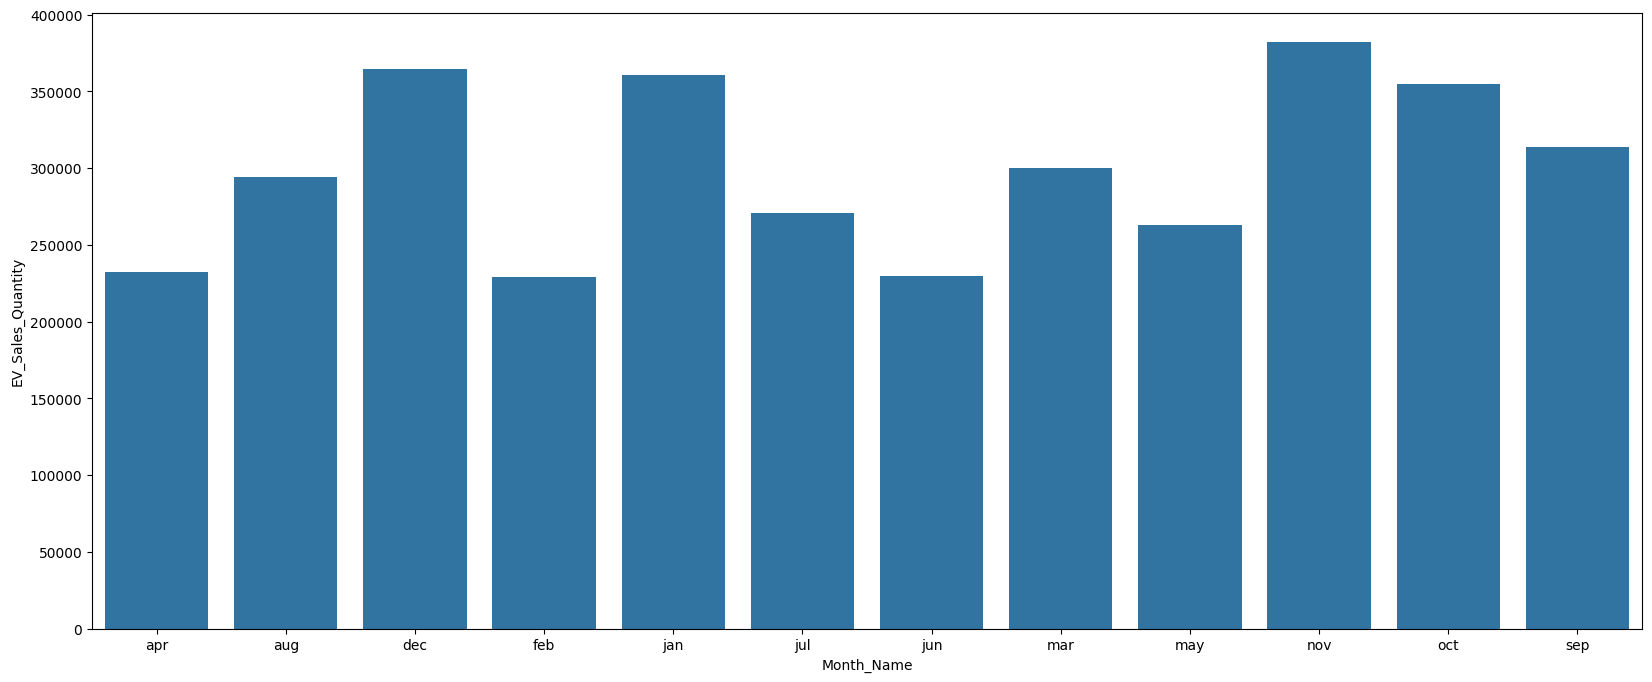

In [19]:
# EV SALES ACROSS EVERY MONTH
plt.figure(figsize=(20,8))
monthly_sales = df.groupby('Month_Name')['EV_Sales_Quantity'].sum().reset_index()
sns.barplot(x='Month_Name', y='EV_Sales_Quantity', data=monthly_sales)


<Axes: xlabel='Year'>

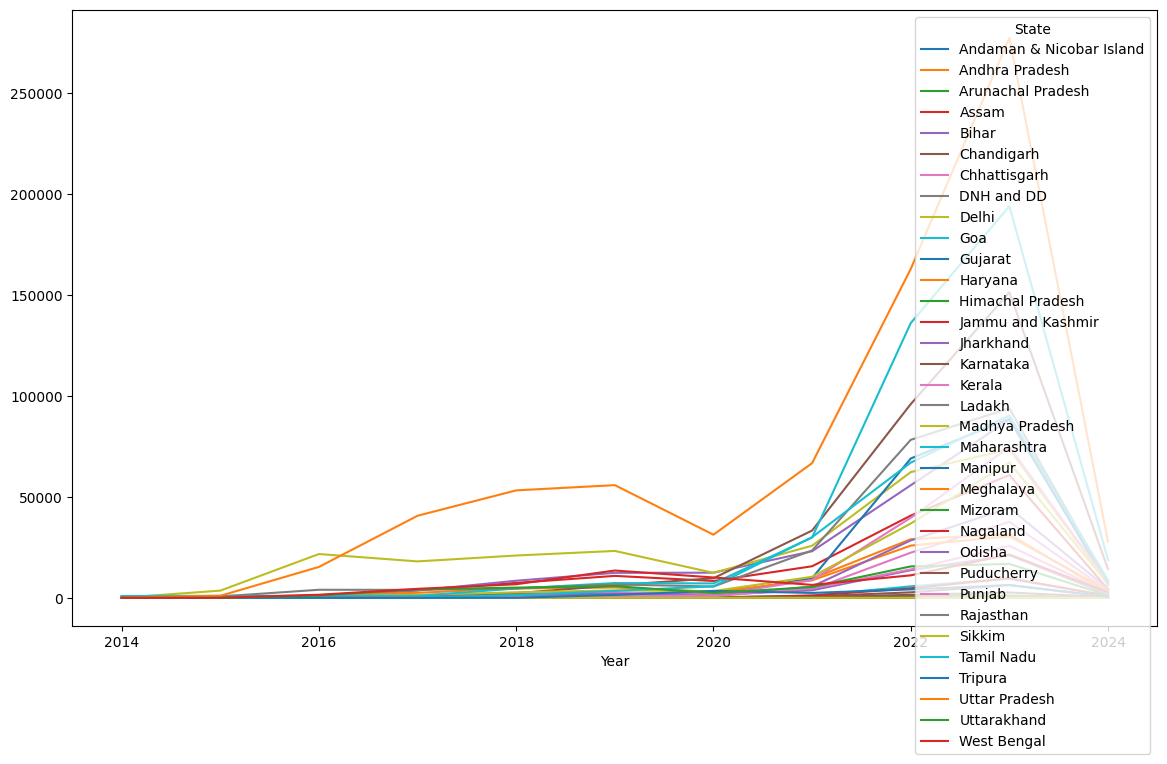

In [20]:
pivot = df.pivot_table(values='EV_Sales_Quantity', index='Year', columns='State', aggfunc='sum')
pivot.plot(figsize=(14,8))

<Axes: xlabel='Year', ylabel='EV_Sales_Quantity'>

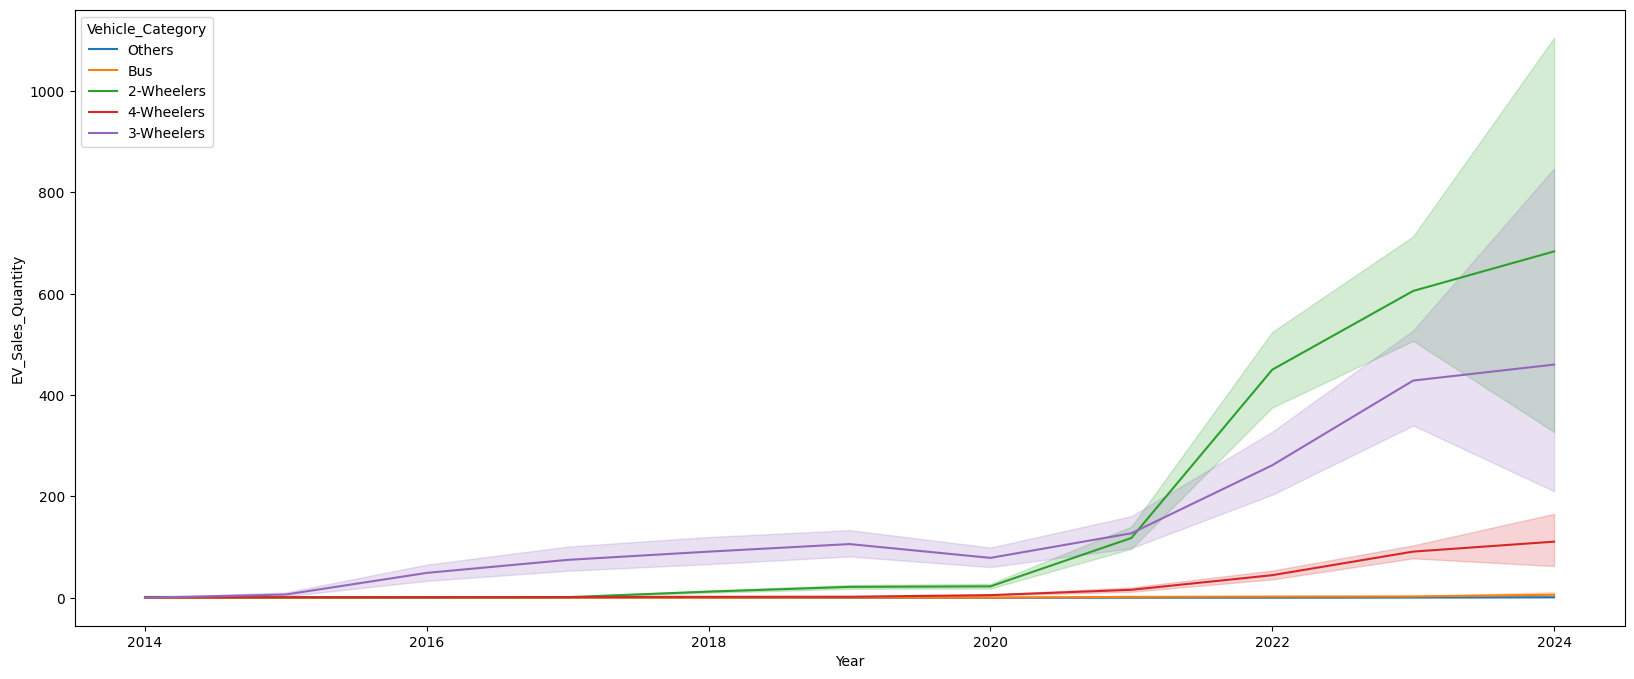

In [21]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Year', y='EV_Sales_Quantity', hue='Vehicle_Category', data=df)